<a href="https://colab.research.google.com/github/Sourav-Manik/Data-Science-Assignment/blob/main/Assignment_11_Text_Mining_Amazon_product_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
import pandas
product=pd.read_csv("/content/Amazon gym ropes product review.csv", encoding='latin-1',error_bad_lines=False)
product.drop(['ï»¿Sr no.'],inplace=True,axis=1)
product.head(5)

,Review
0,There is no double-coated layer. after one mon...
1,Brilliant cheap product\nBest investment\nDoor...
2,It's only rubber and it expands after 3 to 4 d...
3,Perfect equipment for people who can't afford ...
4,very good product and packaging was nice. its ...


In [ ]:
product = [Review.strip() for Review in product.Review] # remove both the leading and the trailing characters
product = [Review for Review in product if Review] # removes empty strings, because they are considered in Python as False
product[0:10]

['There is no double-coated layer. after one month of use, it breaks up.',
 'Brilliant cheap product\nBest investment\nDoorknob is small but does the job',
 "It's only rubber and it expands after 3 to 4 days use and resistance becomes less",
 "Perfect equipment for people who can't afford gym and heavy equipments",
 'very good product and packaging was nice. its easy to use after few days and works well',
 'I found this product helpful for home gym and there was also the wheight written there',
 'Very easy to use and is handy..can keep it with us and travel..useful to start with',
 'The exercise guide was nor provided.',
 'Its a very good product, very use full product. Soft bend',
 'Nice quality product in such price']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(product))
sentences[5:15]

['Soft bend Nice quality product in such price Super product ..easy to use .',
 'Quality is suprb .. most usable to zym .',
 'Very niceâ\x80¦ This is a very good product.',
 'The bands are strong, durable,and easy to use.... value for money Very nice product for all exercise and I like it Easy to use..\nRubber elastic is goodâ\x80¦ Colours are good nd nothing is there to dislike Only few days I used it .and then break down.',
 'Good Quality Good To bad just broke up at first time Inside the bag manual is not come Value for money ..nice product Good product happy with the service ð\x9f\x99\x82 Good labeling of kg Good product for home gym Very comfortable product Best product.',
 'Not value for money The grip is good Good product Good Nice 1.0 out of 5 stars Worst !!!!',
 'Not value for money.',
 'The resistance bands are of very poor quality and gets torn easily.',
 'Worst quality.',
 "22.9 kg band broke within 1 month I travel a lot, and I'm bound to miss my gym while travelling."]

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,There is no double-coated layer.
1,"after one month of use, it breaks up."
2,Brilliant cheap product\nBest investment\nDoor...
3,its easy to use after few days and works well ...
4,"Its a very good product, very use full product."
5,Soft bend Nice quality product in such price S...
6,Quality is suprb .. most usable to zym .
7,Very niceâ¦ This is a very good product.
8,"The bands are strong, durable,and easy to use...."
9,Good Quality Good To bad just broke up at firs...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'resistance')

0

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     5
1     8
2    46
3    48
4     9
5    14
6     9
7     8
8    47
9    44
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
32,I am been using these Resistance band by 2 wea...,4,24
29,These bands are very cool and very easy to use...,4,32
3,its easy to use after few days and works well ...,6,48
5,Soft bend Nice quality product in such price S...,7,14
20,This fitness band is the best thing to replace...,7,61
19,"The bands, handles and hooks are all of the be...",7,22
30,Good Quality\nBest For Home Workout\nVery Stro...,9,32
8,"The bands are strong, durable,and easy to use....",10,47
2,Brilliant cheap product\nBest investment\nDoor...,17,46
9,Good Quality Good To bad just broke up at firs...,23,44


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    37.000000
mean      3.189189
std       5.125307
min      -3.000000
25%       0.000000
50%       2.000000
75%       4.000000
max      23.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,There is no double-coated layer.,-1,5
1,"after one month of use, it breaks up.",0,8
6,Quality is suprb .. most usable to zym .,0,9
11,Not value for money.,0,4
12,The resistance bands are of very poor quality ...,-2,12


In [ ]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
2,Brilliant cheap product\nBest investment\nDoor...,17,46
8,"The bands are strong, durable,and easy to use....",10,47
9,Good Quality Good To bad just broke up at firs...,23,44


In [ ]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


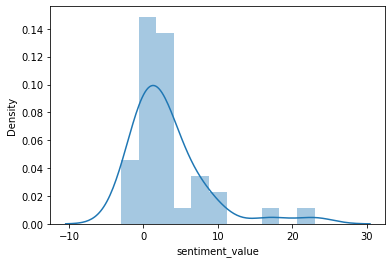

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

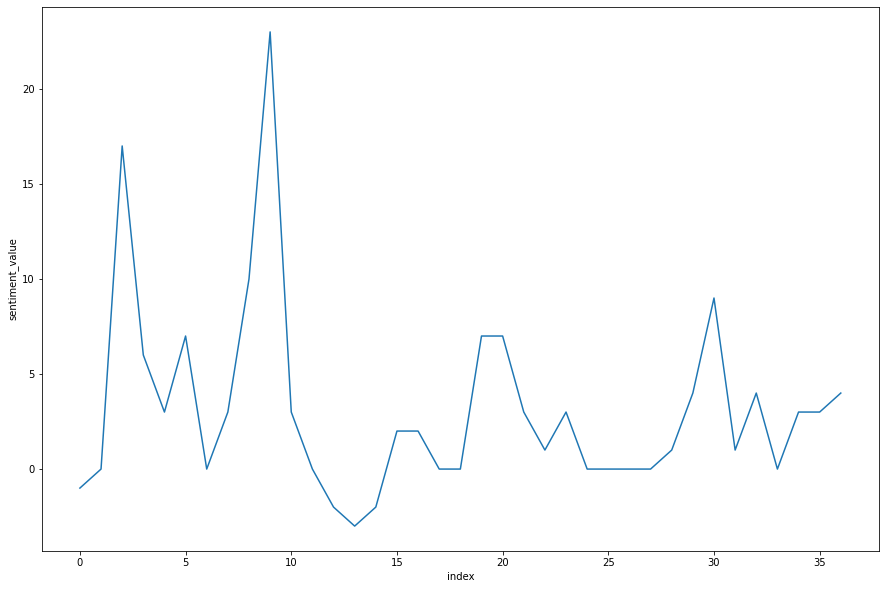

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

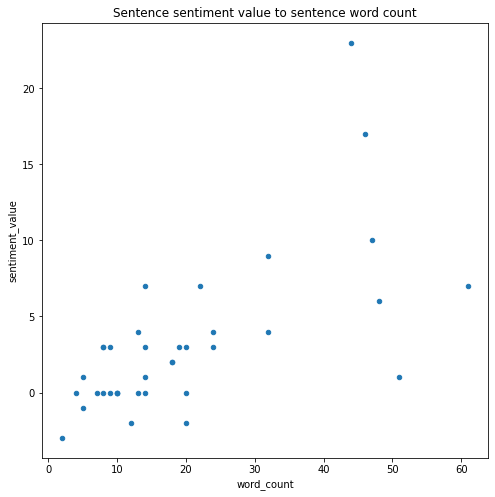

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')